## Section 2: Android App Data
The section data set I found was an excel table of Android App Data that had been scraped from the google store. We are going to look into what factors produce the highest ratings.

In [1]:
#Import the basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
import seaborn as sns

In [2]:
aapps_df = pd.read_excel(r"C:\Users\zgeorge\Dropbox (CMN Hospitals)\George\School\Fall 2018\Applied Machine Learning\practice_python\Homework 1\Android_Data.xlsx")
aapps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up


In [3]:
aapps_df['Price'].replace({'Free': 0})
aapps_df['Installs'].replace({"+": ""})
aapps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [4]:
null_columns=aapps_df.columns[aapps_df.isnull().any()]
aapps_df[null_columns].isnull().sum()

App                  1
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
def findnulls(col):
    print("***********", col ," NA's***********")
    print(aapps_df[aapps_df[col].isnull()][null_columns])

In [6]:
findnulls('Type')

*********** Type  NA's***********
                            App  Rating Type Content Rating  \
9148  Command & Conquer: Rivals     NaN  NaN   Everyone 10+   

             Current Ver         Android Ver  
9148  Varies with device  Varies with device  


In [7]:
findnulls('Content Rating')

*********** Content Rating  NA's***********
                                           App  Rating Type Content Rating  \
10472  Life Made WI-Fi Touchscreen Photo Frame    19.0    0            NaN   

      Current Ver Android Ver  
10472  4.0 and up         NaN  


In [8]:
findnulls('Current Ver')

*********** Current Ver  NA's***********
                                   App  Rating  Type Content Rating  \
15     Learn To Draw Kawaii Characters     3.2  Free       Everyone   
1553              Market Update Helper     4.1  Free       Everyone   
6322            Virtual DJ Sound Mixer     4.2  Free       Everyone   
6803                         BT Master     NaN  Free       Everyone   
7333                       Dots puzzle     4.0  Paid       Everyone   
7407                   Calculate My IQ     NaN  Free       Everyone   
7730                            UFO-CQ     NaN  Paid       Everyone   
10342                   La Fe de Jesus     NaN  Free       Everyone   

      Current Ver Android Ver  
15            NaN  4.2 and up  
1553          NaN  1.5 and up  
6322          NaN  4.0 and up  
6803          NaN  1.6 and up  
7333          NaN  4.0 and up  
7407          NaN  2.3 and up  
7730          NaN  2.0 and up  
10342         NaN  3.0 and up  


In [9]:
findnulls('Android Ver')

*********** Android Ver  NA's***********
                                           App  Rating  Type Content Rating  \
4453                    [substratum] Vacuum: P     4.4  Paid       Everyone   
4490                      Pi Dark [substratum]     4.5  Free       Everyone   
10472  Life Made WI-Fi Touchscreen Photo Frame    19.0     0            NaN   

      Current Ver Android Ver  
4453          4.4         NaN  
4490          1.1         NaN  
10472  4.0 and up         NaN  


In [10]:
aapps_df = aapps_df[aapps_df.App != 'Life Made WI-Fi Touchscreen Photo Frame']
aapps_df = aapps_df.dropna()

In [11]:
aapps_df = aapps_df.sort_values('Price',ascending=False)
aapps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400,Everyone,Lifestyle,2018-05-03 00:00:00,1.0.1,4.1 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,2017-12-11 00:00:00,1,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000,Paid,399.99,Everyone,Finance,2018-06-25 00:00:00,1.0.2,4.1 and up
5369,I am Rich,FINANCE,4.3,180,3.8M,5000,Paid,399.99,Everyone,Finance,2018-03-22 00:00:00,1,4.2 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,2018-07-16 00:00:00,1,7.0 and up


In [12]:
qPrice = aapps_df['Price'].quantile(0.99)
aapps_df = aapps_df[aapps_df["Price"] < qPrice]

In [13]:
aapps_df[['Rating','Reviews','Installs','Price']] = aapps_df[['Rating','Reviews','Installs','Price']].apply(pd.to_numeric)
aapps_df[['Category','Type','Content Rating', 'Genres']] = aapps_df[['Category','Type','Content Rating', 'Genres']].astype('category')
aapps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9264 entries, 5909 to 10840
Data columns (total 13 columns):
App               9264 non-null object
Category          9264 non-null category
Rating            9264 non-null float64
Reviews           9264 non-null int64
Size              9264 non-null object
Installs          9264 non-null int64
Type              9264 non-null category
Price             9264 non-null float64
Content Rating    9264 non-null category
Genres            9264 non-null category
Last Updated      9264 non-null object
Current Ver       9264 non-null object
Android Ver       9264 non-null object
dtypes: category(4), float64(2), int64(2), object(5)
memory usage: 767.6+ KB


In [14]:
aapps_df.describe()

,Rating,Reviews,Installs,Price
count,9264.000000,9.264000e+03,9.264000e+03,9264.000000
mean,4.192206,5.196866e+05,1.809411e+07,0.182596
std,0.515496,3.160844e+06,9.171982e+07,0.837572
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.950000e+02,1.000000e+04,0.000000
50%,4.300000,6.190500e+03,5.000000e+05,0.000000
75%,4.500000,8.391250e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,8.490000


                    Price    Rating
Category                           
MEDICAL          0.589126  4.187702
WEATHER          0.392400  4.244000
PERSONALIZATION  0.373891  4.335370
FAMILY           0.252792  4.189611
TOOLS            0.243393  4.047059


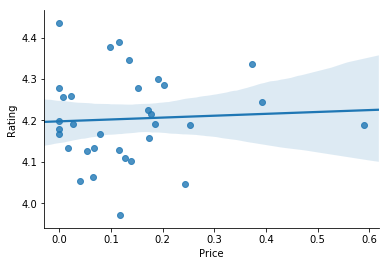

In [15]:
toptable1 = aapps_df.pivot_table(['Rating','Price'],'Category')
toptable1 = toptable1.sort_values('Price', ascending=False)
print(toptable1.head(5))
sns.regplot('Price','Rating',toptable1)
sns.despine()

C:\Users\zgeorge\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\zgeorge\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


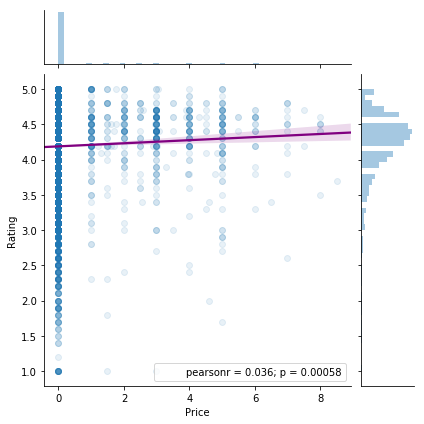

In [16]:
joint1 = sns.jointplot('Price','Rating',aapps_df,joint_kws= {'alpha': 0.1},)
sns.regplot('Price','Rating',aapps_df, ax=joint1.ax_joint, scatter=False,color='purple')
sns.despine()

C:\Users\zgeorge\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\zgeorge\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


TypeError: inner() got multiple values for argument 'ax'

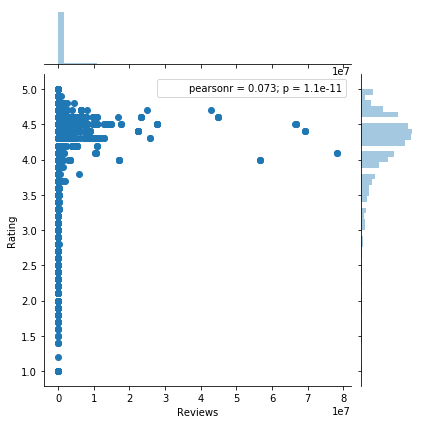

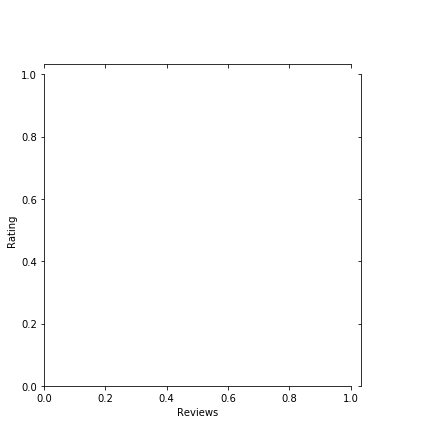

In [33]:
paid_aapps_df = aapps_df[aapps_df.Type != 'Paid']
#new_df = df[df.C != 'XYZ']
free_aapps_df = aapps_df[aapps_df.Type != 'Free']


g = sns.jointplot('Reviews','Rating',paid_aapps_df,)
sns.jointplot('Reviews','Rating',free_aapps_df,ax=g,scatter_kws={'alpha':0.1}, markers=',')
sns.despine()
#Set the Title of the graph from here
plt.title('Ratings based on Reviews by Paid App')
plt.ylim(1,5)
